In [2]:
import sys
import os
import time
import datetime
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
import seaborn as sn
from scipy import stats

from keras import backend as K
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

path_main_folder = '/home/antorosi/Documents/AutoEncoder'

sys.path.append(path_main_folder)

from CVAE.cvae import compile_cvae, run_cvae
from CVAE.cvae_model import CVAE
from conso.load_shape_data import *  
from conso.conso_helpers import plot_latent_space_projection, pyplot_latent_space_projection_temp, pyplot_latent_space_projection_error

### Load and shape data

In [3]:
# Load raw data
path_data = os.path.join(path_main_folder, 'data')
dict_data_conso = load_data_conso(path_data)

In [4]:
# Load Holiday day information
holiday_days_csv = os.path.join(path_data, "joursFeries.csv")
holiday_days_df = pd.read_csv(holiday_days_csv, sep=";")
holiday_days_df.ds = pd.to_datetime(holiday_days_df.ds)
holiday_days_df['is_hd'] = 1

In [5]:
# Unifomization
data_conso_df, dict_colnames_conso = get_uniformed_data_conso(dict_data_conso)

In [6]:
# Change ganularity ?
name_granu = '15m'
data_conso_df = change_granularity(data_conso_df, granularity="15min")

In [7]:
# Get x_conso dataframe for autoencoder purpose
x_conso = get_x_conso_autoencoder(data_conso_df, dict_colnames_conso)

### Cross validation parameters

In [81]:
# folder to store results
path_out = os.path.join(path_main_folder, 'out', 'cv_model_3')
if not os.path.exists(path_out):
    os.mkdir(path_out)

In [82]:
# Test periods for each K step of the cross-validation
cv_periods = {}
cv_periods['period_1'] = (datetime.datetime(year=2013, month=1, day=1), datetime.datetime(year=2013, month=12, day=31))
cv_periods['period_2'] = (datetime.datetime(year=2014, month=1, day=1), datetime.datetime(year=2014, month=12, day=31))
cv_periods['period_3'] = (datetime.datetime(year=2015, month=1, day=1), datetime.datetime(year=2015, month=12, day=31))
cv_periods['period_4'] = (datetime.datetime(year=2016, month=1, day=1), datetime.datetime(year=2016, month=12, day=31))
cv_periods['period_5'] = (datetime.datetime(year=2017, month=1, day=1), datetime.datetime(year=2017, month=12, day=31))

In [83]:
type_scaler = 'standard'
name_type_cond = 'm-wd'
name_train = '0' # 1: first period ; 0 all periods
name_type_x = 'c'
type_x = ['conso']
type_cond = ['month', 'weekday']

### Build data set

In [84]:
# Getting each datasets
dict_datasets = {}
for key, date_period in cv_periods.items():
    dict_xconso = get_train_test_x_conso(x_conso, date_period[0], date_period[1])
    dict_xconso = normalize_xconso(dict_xconso, dict_colnames_conso, type_scaler = type_scaler)
    dataset = get_dataset_autoencoder(dict_xconso=dict_xconso, type_x=type_x, type_cond=type_cond)
    
    dict_datasets[key] = {'dataset': dataset}

### Model parameters 

In [85]:
# Parameters
cond_dim = dict_datasets['period_1']['dataset']['train']['x'][1].shape[1]
e_dims=[48,24,12]
d_dims=[12,24,48]
z_dim= 2
beta = 0.3

training_epochs=200
batch_size=20

In [86]:
# Prepare results wrap up 
results_df = pd.DataFrame(columns=['name', 
                                   'loss', 'kl_loss', 'recon_loss', 
                                   'val_loss', 'val_kl_loss', 'val_recon_loss'])
path_results = path_out

### Training

========================= Model 1 =========================
complete model: 
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_true (InputLayer)             (None, 96)           0                                            
__________________________________________________________________________________________________
cond (InputLayer)               (None, 14)           0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 2), (None, 2 6856        x_true[0][0]                     
                                                                 cond[0][0]                       
__________________________________________________________________________________________________
sample_z (Lambda)               

Epoch 55/200
1465/1465 [==============================] - 0s 77us/step - loss: 2.2647 - kl_loss: 2.8057 - recon_loss: 1.4230 - val_loss: 2.9511 - val_kl_loss: 3.0526 - val_recon_loss: 2.0353
Epoch 56/200
1465/1465 [==============================] - 0s 72us/step - loss: 2.2546 - kl_loss: 2.7756 - recon_loss: 1.4219 - val_loss: 3.4056 - val_kl_loss: 3.1425 - val_recon_loss: 2.4629
Epoch 57/200
1465/1465 [==============================] - 0s 79us/step - loss: 2.2279 - kl_loss: 2.8109 - recon_loss: 1.3846 - val_loss: 2.9299 - val_kl_loss: 3.0386 - val_recon_loss: 2.0183
Epoch 58/200
1465/1465 [==============================] - 0s 84us/step - loss: 2.2446 - kl_loss: 2.7839 - recon_loss: 1.4094 - val_loss: 3.6456 - val_kl_loss: 3.3782 - val_recon_loss: 2.6321
Epoch 59/200
1465/1465 [==============================] - 0s 83us/step - loss: 2.2287 - kl_loss: 2.8187 - recon_loss: 1.3831 - val_loss: 2.7684 - val_kl_loss: 2.9315 - val_recon_loss: 1.8890
Epoch 60/200
1465/1465 [=====================

Epoch 98/200
1465/1465 [==============================] - 0s 80us/step - loss: 2.0516 - kl_loss: 2.6833 - recon_loss: 1.2466 - val_loss: 2.6609 - val_kl_loss: 3.1414 - val_recon_loss: 1.7185
Epoch 99/200
1465/1465 [==============================] - 0s 79us/step - loss: 2.0875 - kl_loss: 2.6859 - recon_loss: 1.2818 - val_loss: 2.4911 - val_kl_loss: 2.9974 - val_recon_loss: 1.5919
Epoch 100/200
1465/1465 [==============================] - 0s 82us/step - loss: 2.0328 - kl_loss: 2.6730 - recon_loss: 1.2309 - val_loss: 2.4103 - val_kl_loss: 3.0082 - val_recon_loss: 1.5078
Epoch 101/200
1465/1465 [==============================] - 0s 76us/step - loss: 2.0492 - kl_loss: 2.6293 - recon_loss: 1.2604 - val_loss: 3.3163 - val_kl_loss: 2.9551 - val_recon_loss: 2.4297
Epoch 102/200
1465/1465 [==============================] - 0s 78us/step - loss: 2.0569 - kl_loss: 2.6737 - recon_loss: 1.2548 - val_loss: 2.5320 - val_kl_loss: 2.9844 - val_recon_loss: 1.6366
Epoch 103/200
1465/1465 [=================

Epoch 141/200
1465/1465 [==============================] - 0s 69us/step - loss: 1.9612 - kl_loss: 2.5568 - recon_loss: 1.1941 - val_loss: 3.2007 - val_kl_loss: 2.9727 - val_recon_loss: 2.3089
Epoch 142/200
1465/1465 [==============================] - 0s 70us/step - loss: 1.9639 - kl_loss: 2.6027 - recon_loss: 1.1831 - val_loss: 3.4198 - val_kl_loss: 2.6004 - val_recon_loss: 2.6397
Epoch 143/200
1465/1465 [==============================] - 0s 70us/step - loss: 1.9482 - kl_loss: 2.5651 - recon_loss: 1.1787 - val_loss: 2.5733 - val_kl_loss: 2.7702 - val_recon_loss: 1.7423
Epoch 144/200
1465/1465 [==============================] - 0s 69us/step - loss: 1.9590 - kl_loss: 2.5776 - recon_loss: 1.1857 - val_loss: 3.5491 - val_kl_loss: 2.8816 - val_recon_loss: 2.6846
Epoch 145/200
1465/1465 [==============================] - 0s 71us/step - loss: 1.9599 - kl_loss: 2.5938 - recon_loss: 1.1818 - val_loss: 2.3673 - val_kl_loss: 2.7729 - val_recon_loss: 1.5355
Epoch 146/200
1465/1465 [===============

Epoch 184/200
1465/1465 [==============================] - 0s 76us/step - loss: 1.8681 - kl_loss: 2.4419 - recon_loss: 1.1356 - val_loss: 2.4202 - val_kl_loss: 2.5771 - val_recon_loss: 1.6471
Epoch 185/200
1465/1465 [==============================] - 0s 77us/step - loss: 1.8928 - kl_loss: 2.4695 - recon_loss: 1.1520 - val_loss: 2.3307 - val_kl_loss: 2.8269 - val_recon_loss: 1.4826
Epoch 186/200
1465/1465 [==============================] - 0s 75us/step - loss: 1.9077 - kl_loss: 2.5084 - recon_loss: 1.1552 - val_loss: 2.7440 - val_kl_loss: 2.8791 - val_recon_loss: 1.8803
Epoch 187/200
1465/1465 [==============================] - 0s 79us/step - loss: 1.9004 - kl_loss: 2.5276 - recon_loss: 1.1422 - val_loss: 2.4228 - val_kl_loss: 2.7444 - val_recon_loss: 1.5995
Epoch 188/200
1465/1465 [==============================] - 0s 83us/step - loss: 1.8750 - kl_loss: 2.4582 - recon_loss: 1.1375 - val_loss: 2.4562 - val_kl_loss: 2.7168 - val_recon_loss: 1.6412
Epoch 189/200
1465/1465 [===============

Train on 1465 samples, validate on 365 samples
Epoch 1/200
1465/1465 [==============================] - 0s 152us/step - loss: 45.1249 - kl_loss: 14.2835 - recon_loss: 40.8399 - val_loss: 11.1516 - val_kl_loss: 11.5815 - val_recon_loss: 7.6772
Epoch 2/200
1465/1465 [==============================] - 0s 75us/step - loss: 8.1910 - kl_loss: 9.8796 - recon_loss: 5.2272 - val_loss: 6.1320 - val_kl_loss: 7.4091 - val_recon_loss: 3.9093
Epoch 3/200
1465/1465 [==============================] - 0s 73us/step - loss: 5.9771 - kl_loss: 7.1773 - recon_loss: 3.8239 - val_loss: 5.1529 - val_kl_loss: 6.4444 - val_recon_loss: 3.2195
Epoch 4/200
1465/1465 [==============================] - 0s 79us/step - loss: 5.1544 - kl_loss: 6.1332 - recon_loss: 3.3144 - val_loss: 4.7284 - val_kl_loss: 5.7179 - val_recon_loss: 3.0130
Epoch 5/200
1465/1465 [==============================] - 0s 74us/step - loss: 4.6331 - kl_loss: 5.4432 - recon_loss: 3.0001 - val_loss: 4.8041 - val_kl_loss: 5.2958 - val_recon_loss: 3.21

Epoch 44/200
1465/1465 [==============================] - 0s 72us/step - loss: 2.2559 - kl_loss: 3.4851 - recon_loss: 1.2103 - val_loss: 2.8241 - val_kl_loss: 3.4358 - val_recon_loss: 1.7933
Epoch 45/200
1465/1465 [==============================] - 0s 82us/step - loss: 2.1938 - kl_loss: 3.4412 - recon_loss: 1.1615 - val_loss: 3.3960 - val_kl_loss: 3.4588 - val_recon_loss: 2.3584
Epoch 46/200
1465/1465 [==============================] - 0s 81us/step - loss: 2.2560 - kl_loss: 3.4542 - recon_loss: 1.2198 - val_loss: 2.4868 - val_kl_loss: 3.6142 - val_recon_loss: 1.4026
Epoch 47/200
1465/1465 [==============================] - 0s 75us/step - loss: 2.2263 - kl_loss: 3.4809 - recon_loss: 1.1820 - val_loss: 2.3408 - val_kl_loss: 3.3000 - val_recon_loss: 1.3508
Epoch 48/200
1465/1465 [==============================] - 0s 79us/step - loss: 2.2235 - kl_loss: 3.4300 - recon_loss: 1.1945 - val_loss: 2.4176 - val_kl_loss: 3.3672 - val_recon_loss: 1.4074
Epoch 49/200
1465/1465 [=====================

Epoch 87/200
1465/1465 [==============================] - 0s 77us/step - loss: 1.9043 - kl_loss: 3.0886 - recon_loss: 0.9778 - val_loss: 2.8078 - val_kl_loss: 3.1307 - val_recon_loss: 1.8685
Epoch 88/200
1465/1465 [==============================] - 0s 87us/step - loss: 1.9656 - kl_loss: 3.1140 - recon_loss: 1.0314 - val_loss: 2.2148 - val_kl_loss: 3.1182 - val_recon_loss: 1.2793
Epoch 89/200
1465/1465 [==============================] - 0s 81us/step - loss: 1.8996 - kl_loss: 3.0715 - recon_loss: 0.9781 - val_loss: 2.9241 - val_kl_loss: 2.8863 - val_recon_loss: 2.0582
Epoch 90/200
1465/1465 [==============================] - 0s 81us/step - loss: 1.9017 - kl_loss: 2.9994 - recon_loss: 1.0019 - val_loss: 2.6858 - val_kl_loss: 2.8272 - val_recon_loss: 1.8377
Epoch 91/200
1465/1465 [==============================] - 0s 85us/step - loss: 1.8985 - kl_loss: 2.9902 - recon_loss: 1.0014 - val_loss: 2.4304 - val_kl_loss: 2.8433 - val_recon_loss: 1.5774
Epoch 92/200
1465/1465 [=====================

Epoch 130/200
1465/1465 [==============================] - 0s 81us/step - loss: 1.7817 - kl_loss: 2.8937 - recon_loss: 0.9136 - val_loss: 2.1936 - val_kl_loss: 2.7856 - val_recon_loss: 1.3579
Epoch 131/200
1465/1465 [==============================] - 0s 77us/step - loss: 1.7759 - kl_loss: 2.8766 - recon_loss: 0.9129 - val_loss: 1.9220 - val_kl_loss: 2.8530 - val_recon_loss: 1.0661
Epoch 132/200
1465/1465 [==============================] - 0s 81us/step - loss: 1.7637 - kl_loss: 2.8323 - recon_loss: 0.9140 - val_loss: 2.6398 - val_kl_loss: 2.8081 - val_recon_loss: 1.7974
Epoch 133/200
1465/1465 [==============================] - 0s 85us/step - loss: 1.7508 - kl_loss: 2.8648 - recon_loss: 0.8914 - val_loss: 2.9811 - val_kl_loss: 2.8414 - val_recon_loss: 2.1287
Epoch 134/200
1465/1465 [==============================] - 0s 83us/step - loss: 1.7643 - kl_loss: 2.8516 - recon_loss: 0.9089 - val_loss: 2.8036 - val_kl_loss: 2.7866 - val_recon_loss: 1.9676
Epoch 135/200
1465/1465 [===============

Epoch 173/200
1465/1465 [==============================] - 0s 81us/step - loss: 1.6764 - kl_loss: 2.7426 - recon_loss: 0.8536 - val_loss: 2.3138 - val_kl_loss: 2.6607 - val_recon_loss: 1.5156
Epoch 174/200
1465/1465 [==============================] - 0s 87us/step - loss: 1.7034 - kl_loss: 2.7573 - recon_loss: 0.8762 - val_loss: 2.0018 - val_kl_loss: 2.7480 - val_recon_loss: 1.1774
Epoch 175/200
1465/1465 [==============================] - 0s 83us/step - loss: 1.7157 - kl_loss: 2.7793 - recon_loss: 0.8819 - val_loss: 2.3230 - val_kl_loss: 2.9392 - val_recon_loss: 1.4413
Epoch 176/200
1465/1465 [==============================] - 0s 83us/step - loss: 1.6901 - kl_loss: 2.7786 - recon_loss: 0.8565 - val_loss: 2.2683 - val_kl_loss: 2.6116 - val_recon_loss: 1.4848
Epoch 177/200
1465/1465 [==============================] - 0s 81us/step - loss: 1.7134 - kl_loss: 2.7040 - recon_loss: 0.9023 - val_loss: 1.8527 - val_kl_loss: 2.5887 - val_recon_loss: 1.0761
Epoch 178/200
1465/1465 [===============

Train on 1465 samples, validate on 365 samples
Epoch 1/200
1465/1465 [==============================] - 0s 157us/step - loss: 32.8036 - kl_loss: 13.9026 - recon_loss: 28.6328 - val_loss: 10.5141 - val_kl_loss: 11.0378 - val_recon_loss: 7.2028
Epoch 2/200
1465/1465 [==============================] - 0s 82us/step - loss: 7.9636 - kl_loss: 8.6993 - recon_loss: 5.3538 - val_loss: 7.5052 - val_kl_loss: 7.0179 - val_recon_loss: 5.3998
Epoch 3/200
1465/1465 [==============================] - 0s 78us/step - loss: 5.8214 - kl_loss: 6.7344 - recon_loss: 3.8011 - val_loss: 5.6247 - val_kl_loss: 7.2487 - val_recon_loss: 3.4501
Epoch 4/200
1465/1465 [==============================] - 0s 81us/step - loss: 4.9494 - kl_loss: 6.0216 - recon_loss: 3.1429 - val_loss: 4.5561 - val_kl_loss: 6.2325 - val_recon_loss: 2.6864
Epoch 5/200
1465/1465 [==============================] - 0s 84us/step - loss: 4.4776 - kl_loss: 5.6837 - recon_loss: 2.7724 - val_loss: 6.7894 - val_kl_loss: 5.6037 - val_recon_loss: 5.10

Epoch 44/200
1465/1465 [==============================] - 0s 86us/step - loss: 2.4380 - kl_loss: 4.0642 - recon_loss: 1.2187 - val_loss: 2.4788 - val_kl_loss: 4.2379 - val_recon_loss: 1.2074
Epoch 45/200
1465/1465 [==============================] - 0s 84us/step - loss: 2.4387 - kl_loss: 4.0953 - recon_loss: 1.2102 - val_loss: 2.7668 - val_kl_loss: 3.9212 - val_recon_loss: 1.5905
Epoch 46/200
1465/1465 [==============================] - 0s 83us/step - loss: 2.3863 - kl_loss: 3.9856 - recon_loss: 1.1906 - val_loss: 2.3621 - val_kl_loss: 4.0988 - val_recon_loss: 1.1324
Epoch 47/200
1465/1465 [==============================] - 0s 75us/step - loss: 2.3503 - kl_loss: 3.8846 - recon_loss: 1.1849 - val_loss: 2.5994 - val_kl_loss: 4.2329 - val_recon_loss: 1.3296
Epoch 48/200
1465/1465 [==============================] - 0s 76us/step - loss: 2.3827 - kl_loss: 4.0060 - recon_loss: 1.1809 - val_loss: 2.4990 - val_kl_loss: 4.1135 - val_recon_loss: 1.2649
Epoch 49/200
1465/1465 [=====================

Epoch 87/200
1465/1465 [==============================] - 0s 79us/step - loss: 2.0378 - kl_loss: 3.3355 - recon_loss: 1.0371 - val_loss: 2.0622 - val_kl_loss: 3.4366 - val_recon_loss: 1.0313
Epoch 88/200
1465/1465 [==============================] - 0s 80us/step - loss: 2.0180 - kl_loss: 3.3348 - recon_loss: 1.0176 - val_loss: 2.1788 - val_kl_loss: 3.5206 - val_recon_loss: 1.1226
Epoch 89/200
1465/1465 [==============================] - 0s 84us/step - loss: 2.0165 - kl_loss: 3.3012 - recon_loss: 1.0262 - val_loss: 2.2228 - val_kl_loss: 3.4291 - val_recon_loss: 1.1941
Epoch 90/200
1465/1465 [==============================] - 0s 85us/step - loss: 1.9853 - kl_loss: 3.3040 - recon_loss: 0.9941 - val_loss: 2.3120 - val_kl_loss: 3.2560 - val_recon_loss: 1.3352
Epoch 91/200
1465/1465 [==============================] - 0s 83us/step - loss: 1.9839 - kl_loss: 3.2777 - recon_loss: 1.0006 - val_loss: 2.3578 - val_kl_loss: 3.4602 - val_recon_loss: 1.3197
Epoch 92/200
1465/1465 [=====================

Epoch 130/200
1465/1465 [==============================] - 0s 85us/step - loss: 1.8645 - kl_loss: 3.0664 - recon_loss: 0.9446 - val_loss: 2.0229 - val_kl_loss: 3.0976 - val_recon_loss: 1.0936
Epoch 131/200
1465/1465 [==============================] - 0s 77us/step - loss: 1.8463 - kl_loss: 3.0440 - recon_loss: 0.9331 - val_loss: 2.0612 - val_kl_loss: 3.1513 - val_recon_loss: 1.1158
Epoch 132/200
1465/1465 [==============================] - 0s 90us/step - loss: 1.8426 - kl_loss: 3.1138 - recon_loss: 0.9084 - val_loss: 2.8870 - val_kl_loss: 3.1160 - val_recon_loss: 1.9522
Epoch 133/200
1465/1465 [==============================] - 0s 85us/step - loss: 1.8556 - kl_loss: 3.0697 - recon_loss: 0.9347 - val_loss: 2.3339 - val_kl_loss: 3.1430 - val_recon_loss: 1.3910
Epoch 134/200
1465/1465 [==============================] - 0s 85us/step - loss: 1.8351 - kl_loss: 3.0428 - recon_loss: 0.9223 - val_loss: 2.0804 - val_kl_loss: 3.1893 - val_recon_loss: 1.1236
Epoch 135/200
1465/1465 [===============

Epoch 173/200
1465/1465 [==============================] - 0s 87us/step - loss: 1.7882 - kl_loss: 2.8684 - recon_loss: 0.9277 - val_loss: 1.9249 - val_kl_loss: 3.0794 - val_recon_loss: 1.0011
Epoch 174/200
1465/1465 [==============================] - 0s 83us/step - loss: 1.7347 - kl_loss: 2.8760 - recon_loss: 0.8720 - val_loss: 2.0604 - val_kl_loss: 2.9800 - val_recon_loss: 1.1664
Epoch 175/200
1465/1465 [==============================] - 0s 81us/step - loss: 1.7758 - kl_loss: 2.8834 - recon_loss: 0.9108 - val_loss: 1.9947 - val_kl_loss: 2.8885 - val_recon_loss: 1.1281
Epoch 176/200
1465/1465 [==============================] - 0s 78us/step - loss: 1.7533 - kl_loss: 2.8937 - recon_loss: 0.8852 - val_loss: 2.0642 - val_kl_loss: 2.8595 - val_recon_loss: 1.2064
Epoch 177/200
1465/1465 [==============================] - 0s 77us/step - loss: 1.7445 - kl_loss: 2.8662 - recon_loss: 0.8846 - val_loss: 2.1508 - val_kl_loss: 2.9230 - val_recon_loss: 1.2739
Epoch 178/200
1465/1465 [===============

Train on 1464 samples, validate on 366 samples
Epoch 1/200
1464/1464 [==============================] - 0s 140us/step - loss: 45.4938 - kl_loss: 13.5064 - recon_loss: 41.4419 - val_loss: 12.4941 - val_kl_loss: 7.9228 - val_recon_loss: 10.1173
Epoch 2/200
1464/1464 [==============================] - 0s 84us/step - loss: 8.8084 - kl_loss: 6.9089 - recon_loss: 6.7357 - val_loss: 6.8239 - val_kl_loss: 5.7114 - val_recon_loss: 5.1105
Epoch 3/200
1464/1464 [==============================] - 0s 71us/step - loss: 5.9724 - kl_loss: 4.7898 - recon_loss: 4.5355 - val_loss: 9.4299 - val_kl_loss: 4.7740 - val_recon_loss: 7.9977
Epoch 4/200
1464/1464 [==============================] - 0s 82us/step - loss: 4.8157 - kl_loss: 4.2765 - recon_loss: 3.5328 - val_loss: 5.3094 - val_kl_loss: 3.8062 - val_recon_loss: 4.1675
Epoch 5/200
1464/1464 [==============================] - 0s 76us/step - loss: 4.1836 - kl_loss: 3.9733 - recon_loss: 2.9916 - val_loss: 3.5711 - val_kl_loss: 3.6192 - val_recon_loss: 2.48

Epoch 44/200
1464/1464 [==============================] - 0s 75us/step - loss: 2.2231 - kl_loss: 2.8716 - recon_loss: 1.3616 - val_loss: 3.1056 - val_kl_loss: 2.5861 - val_recon_loss: 2.3298
Epoch 45/200
1464/1464 [==============================] - 0s 86us/step - loss: 2.2316 - kl_loss: 2.9149 - recon_loss: 1.3571 - val_loss: 2.2020 - val_kl_loss: 2.8297 - val_recon_loss: 1.3531
Epoch 46/200
1464/1464 [==============================] - 0s 80us/step - loss: 2.2003 - kl_loss: 2.8957 - recon_loss: 1.3316 - val_loss: 2.1386 - val_kl_loss: 2.6048 - val_recon_loss: 1.3572
Epoch 47/200
1464/1464 [==============================] - 0s 85us/step - loss: 2.1762 - kl_loss: 2.8480 - recon_loss: 1.3218 - val_loss: 2.4384 - val_kl_loss: 2.7020 - val_recon_loss: 1.6278
Epoch 48/200
1464/1464 [==============================] - 0s 84us/step - loss: 2.1904 - kl_loss: 2.8681 - recon_loss: 1.3300 - val_loss: 2.7042 - val_kl_loss: 2.7130 - val_recon_loss: 1.8903
Epoch 49/200
1464/1464 [=====================

Epoch 87/200
1464/1464 [==============================] - 0s 69us/step - loss: 2.0405 - kl_loss: 2.7430 - recon_loss: 1.2176 - val_loss: 2.4093 - val_kl_loss: 2.7323 - val_recon_loss: 1.5896
Epoch 88/200
1464/1464 [==============================] - 0s 73us/step - loss: 2.0399 - kl_loss: 2.7946 - recon_loss: 1.2015 - val_loss: 2.3606 - val_kl_loss: 2.6771 - val_recon_loss: 1.5575
Epoch 89/200
1464/1464 [==============================] - 0s 77us/step - loss: 2.0185 - kl_loss: 2.7448 - recon_loss: 1.1951 - val_loss: 2.9962 - val_kl_loss: 2.8746 - val_recon_loss: 2.1338
Epoch 90/200
1464/1464 [==============================] - 0s 85us/step - loss: 2.0209 - kl_loss: 2.7720 - recon_loss: 1.1893 - val_loss: 2.1441 - val_kl_loss: 2.7076 - val_recon_loss: 1.3318
Epoch 91/200
1464/1464 [==============================] - 0s 86us/step - loss: 2.0105 - kl_loss: 2.7475 - recon_loss: 1.1863 - val_loss: 2.4728 - val_kl_loss: 2.8761 - val_recon_loss: 1.6100
Epoch 92/200
1464/1464 [=====================

Epoch 130/200
1464/1464 [==============================] - 0s 86us/step - loss: 1.9243 - kl_loss: 2.6409 - recon_loss: 1.1321 - val_loss: 2.0223 - val_kl_loss: 2.5965 - val_recon_loss: 1.2433
Epoch 131/200
1464/1464 [==============================] - 0s 87us/step - loss: 1.9122 - kl_loss: 2.6248 - recon_loss: 1.1248 - val_loss: 2.0519 - val_kl_loss: 2.5708 - val_recon_loss: 1.2807
Epoch 132/200
1464/1464 [==============================] - 0s 82us/step - loss: 1.9037 - kl_loss: 2.6198 - recon_loss: 1.1177 - val_loss: 1.9918 - val_kl_loss: 2.5083 - val_recon_loss: 1.2393
Epoch 133/200
1464/1464 [==============================] - 0s 79us/step - loss: 1.9246 - kl_loss: 2.6308 - recon_loss: 1.1354 - val_loss: 1.9874 - val_kl_loss: 2.6103 - val_recon_loss: 1.2043
Epoch 134/200
1464/1464 [==============================] - 0s 89us/step - loss: 1.9016 - kl_loss: 2.5973 - recon_loss: 1.1224 - val_loss: 2.1625 - val_kl_loss: 2.6207 - val_recon_loss: 1.3763
Epoch 135/200
1464/1464 [===============

Epoch 173/200
1464/1464 [==============================] - 0s 77us/step - loss: 1.8542 - kl_loss: 2.5365 - recon_loss: 1.0933 - val_loss: 2.0977 - val_kl_loss: 2.3999 - val_recon_loss: 1.3777
Epoch 174/200
1464/1464 [==============================] - 0s 82us/step - loss: 1.8610 - kl_loss: 2.4714 - recon_loss: 1.1196 - val_loss: 2.1652 - val_kl_loss: 2.5818 - val_recon_loss: 1.3907
Epoch 175/200
1464/1464 [==============================] - 0s 79us/step - loss: 1.8552 - kl_loss: 2.4915 - recon_loss: 1.1078 - val_loss: 2.1941 - val_kl_loss: 2.3358 - val_recon_loss: 1.4933
Epoch 176/200
1464/1464 [==============================] - 0s 79us/step - loss: 1.8459 - kl_loss: 2.4973 - recon_loss: 1.0967 - val_loss: 2.3741 - val_kl_loss: 2.4001 - val_recon_loss: 1.6540
Epoch 177/200
1464/1464 [==============================] - 0s 76us/step - loss: 1.8633 - kl_loss: 2.5294 - recon_loss: 1.1045 - val_loss: 2.4032 - val_kl_loss: 2.5376 - val_recon_loss: 1.6420
Epoch 178/200
1464/1464 [===============

Train on 1465 samples, validate on 365 samples
Epoch 1/200
1465/1465 [==============================] - 0s 137us/step - loss: 41.5447 - kl_loss: 16.0246 - recon_loss: 36.7373 - val_loss: 13.5583 - val_kl_loss: 15.6504 - val_recon_loss: 8.8632
Epoch 2/200
1465/1465 [==============================] - 0s 75us/step - loss: 9.5396 - kl_loss: 11.0265 - recon_loss: 6.2317 - val_loss: 6.8401 - val_kl_loss: 6.9291 - val_recon_loss: 4.7614
Epoch 3/200
1465/1465 [==============================] - 0s 75us/step - loss: 6.5566 - kl_loss: 7.7929 - recon_loss: 4.2187 - val_loss: 5.4247 - val_kl_loss: 5.9734 - val_recon_loss: 3.6327
Epoch 4/200
1465/1465 [==============================] - 0s 84us/step - loss: 5.4573 - kl_loss: 6.9661 - recon_loss: 3.3675 - val_loss: 6.6339 - val_kl_loss: 6.5170 - val_recon_loss: 4.6788
Epoch 5/200
1465/1465 [==============================] - 0s 79us/step - loss: 4.7591 - kl_loss: 6.0290 - recon_loss: 2.9504 - val_loss: 5.5080 - val_kl_loss: 4.9842 - val_recon_loss: 4.0

Epoch 44/200
1465/1465 [==============================] - 0s 83us/step - loss: 2.2189 - kl_loss: 3.3416 - recon_loss: 1.2165 - val_loss: 2.4093 - val_kl_loss: 3.1365 - val_recon_loss: 1.4683
Epoch 45/200
1465/1465 [==============================] - 0s 81us/step - loss: 2.1789 - kl_loss: 3.4281 - recon_loss: 1.1505 - val_loss: 1.8631 - val_kl_loss: 3.0171 - val_recon_loss: 0.9580
Epoch 46/200
1465/1465 [==============================] - 0s 80us/step - loss: 2.2071 - kl_loss: 3.3220 - recon_loss: 1.2105 - val_loss: 1.9622 - val_kl_loss: 3.0816 - val_recon_loss: 1.0377
Epoch 47/200
1465/1465 [==============================] - 0s 84us/step - loss: 2.1820 - kl_loss: 3.3030 - recon_loss: 1.1911 - val_loss: 2.2376 - val_kl_loss: 3.0611 - val_recon_loss: 1.3193
Epoch 48/200
1465/1465 [==============================] - 0s 81us/step - loss: 2.1806 - kl_loss: 3.3525 - recon_loss: 1.1748 - val_loss: 1.9877 - val_kl_loss: 3.2750 - val_recon_loss: 1.0052
Epoch 49/200
1465/1465 [=====================

Epoch 87/200
1465/1465 [==============================] - 0s 71us/step - loss: 1.9579 - kl_loss: 3.1577 - recon_loss: 1.0106 - val_loss: 1.7777 - val_kl_loss: 3.0282 - val_recon_loss: 0.8693
Epoch 88/200
1465/1465 [==============================] - 0s 83us/step - loss: 1.9298 - kl_loss: 3.1530 - recon_loss: 0.9839 - val_loss: 1.9118 - val_kl_loss: 2.9545 - val_recon_loss: 1.0254
Epoch 89/200
1465/1465 [==============================] - 0s 80us/step - loss: 1.9635 - kl_loss: 3.1366 - recon_loss: 1.0225 - val_loss: 1.7612 - val_kl_loss: 2.8840 - val_recon_loss: 0.8960
Epoch 90/200
1465/1465 [==============================] - 0s 90us/step - loss: 1.9776 - kl_loss: 3.1834 - recon_loss: 1.0226 - val_loss: 1.9135 - val_kl_loss: 2.9666 - val_recon_loss: 1.0235
Epoch 91/200
1465/1465 [==============================] - 0s 86us/step - loss: 1.9627 - kl_loss: 3.1592 - recon_loss: 1.0150 - val_loss: 1.8010 - val_kl_loss: 2.8351 - val_recon_loss: 0.9504
Epoch 92/200
1465/1465 [=====================

Epoch 130/200
1465/1465 [==============================] - 0s 77us/step - loss: 1.8282 - kl_loss: 3.0256 - recon_loss: 0.9205 - val_loss: 2.0997 - val_kl_loss: 2.8643 - val_recon_loss: 1.2404
Epoch 131/200
1465/1465 [==============================] - 0s 83us/step - loss: 1.8416 - kl_loss: 3.0184 - recon_loss: 0.9361 - val_loss: 1.7534 - val_kl_loss: 2.8413 - val_recon_loss: 0.9010
Epoch 132/200
1465/1465 [==============================] - 0s 89us/step - loss: 1.8632 - kl_loss: 3.0325 - recon_loss: 0.9534 - val_loss: 1.8428 - val_kl_loss: 2.7252 - val_recon_loss: 1.0252
Epoch 133/200
1465/1465 [==============================] - 0s 83us/step - loss: 1.8346 - kl_loss: 2.9941 - recon_loss: 0.9364 - val_loss: 1.8453 - val_kl_loss: 2.7399 - val_recon_loss: 1.0233
Epoch 134/200
1465/1465 [==============================] - 0s 82us/step - loss: 1.8350 - kl_loss: 2.9562 - recon_loss: 0.9481 - val_loss: 1.7969 - val_kl_loss: 2.7980 - val_recon_loss: 0.9575
Epoch 135/200
1465/1465 [===============

Epoch 173/200
1465/1465 [==============================] - 0s 88us/step - loss: 1.7504 - kl_loss: 2.8868 - recon_loss: 0.8843 - val_loss: 1.8505 - val_kl_loss: 2.6231 - val_recon_loss: 1.0636
Epoch 174/200
1465/1465 [==============================] - 0s 86us/step - loss: 1.7520 - kl_loss: 2.8839 - recon_loss: 0.8869 - val_loss: 1.8226 - val_kl_loss: 2.7353 - val_recon_loss: 1.0020
Epoch 175/200
1465/1465 [==============================] - 0s 79us/step - loss: 1.7521 - kl_loss: 2.8521 - recon_loss: 0.8965 - val_loss: 1.8715 - val_kl_loss: 2.6394 - val_recon_loss: 1.0797
Epoch 176/200
1465/1465 [==============================] - 0s 79us/step - loss: 1.7630 - kl_loss: 2.8913 - recon_loss: 0.8956 - val_loss: 1.7290 - val_kl_loss: 2.6754 - val_recon_loss: 0.9263
Epoch 177/200
1465/1465 [==============================] - 0s 90us/step - loss: 1.7572 - kl_loss: 2.8726 - recon_loss: 0.8955 - val_loss: 1.6025 - val_kl_loss: 2.6931 - val_recon_loss: 0.7945
Epoch 178/200
1465/1465 [===============

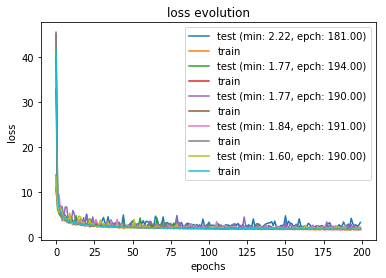

In [87]:
idx = 0

for name_period, el in dict_datasets.items():
    dataset = el['dataset']

    print('========================= Model {} ========================='.format(idx+1))

    # Prepare model characteristics
    name_model = '{}_cvae_conso_e48-24-12_d12-24-48_gran-{}_z{}_beta{}_x-{}_cond-{}'.format(name_period,name_granu,z_dim,beta,name_type_x, name_type_cond)

    # Compile model
    model = CVAE(cond_dim=cond_dim, 
             e_dims=e_dims, 
             d_dims=d_dims, 
             z_dim=z_dim, 
             beta=beta,
             name=name_model, 
             output=path_out)

    # Prepare callbacks
    callbacks = []
    
    tensorboard_model = TensorBoard(log_dir=os.path.join(path_out, name_model, 'results', 'logs', time.strftime('%Y-%m-%d_%H:%M', time.localtime(time.time()))))
    tensorboard_summary = TensorBoard(log_dir=os.path.join(path_out, 'logs', name_model))

    callbacks.append(tensorboard_model)
    callbacks.append(tensorboard_summary)

    # Train model
    model.main_train(dataset, training_epochs=training_epochs, batch_size=batch_size, 
                     callbacks=callbacks, verbose=False)

    # Get result and put it in results
    result = {}
    result['name'] = name_period
    for key, el in model.history.items():
        result[key] = el[-1]
    
    results_df= results_df.append(result, ignore_index=True)
    results_df.to_csv(os.path.join(path_results, 'cv_results.csv'), sep=';')

    # Reset graph
    K.clear_session()
    import tensorflow as tf
    tf.reset_default_graph()
    
    idx += 1

In [80]:
with open(os.path.join(path_out, 'dict_datasets.pickle'),'wb') as f:
    pickle.dump(dict_datasets, f)